# Stats and Public Health Part 2
**Carol Calderon
February 2023**

## 1. Introduction

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

The dataset contains mosquito tracking data from 2008 to 2019.

In epidemiological terms it is known that the most important information respecting public health and vector disseases is the knowledge about:
- Mosquitos species
- Virus prevalence
- Host availability
- Environmental conditions
- Human behaviour

Understanding and addressing these factors is important for the development of effective strategies to control the transmission of mosquito viruses.

**Main objective**

Explore and summarize the data, identifying patterns and relationships between variables in order to make predictions about the number of mosquitos and the virus prevalence.

**Data dictionary**

| COLUMN NAME | DESCRIPTION | NOTE       |
| ----------- | ----------- |----------- |
|Year:        |Year that the WNV test is performed| |
|Week:        |Week that the WNV test is performed| |
|Month:        |Month that the WNV test is performed| |
|Addres Block:| Address of the location of trap| |
|Block:       |Block number of address	|	|	
|Trap:        |Id of the trap|	Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.|
|Trap type:   |Type of trap| |
|Date:        |Date and time that the WNV test is performed| Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.|
|Mosquito number: |Number of mosquitoes caught in this trap |*These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.|
|WNV Present: |West Nile Virus was present in these mosquitos	string		
|Species: |Mosquito species| 
|Lat: |Latitude of trap|
|Lon: |Longitude of trap|

## 2. Import libraries and load the data.

In [ ]:
# Import the requiered libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in the csv to a DataFrame (google colab)
from google.colab import files
uploaded = files.upload()

Saving mosquito_data_part_2.csv to mosquito_data_part_2.csv


In [ ]:
# Read in the csv to a DataFrame (google colab)
import io
df = pd.read_csv(io.BytesIO(uploaded['mosquito_data_part_2.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Read in the csv to a DataFrame (anaconda)
# df = pd.read_csv('/data/mosquito_data_part_2.csv')

## 3. Explore the dataframe

In [ ]:
#First rows
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [ ]:
# 5 last rows
df.tail()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,positive,CULEX RESTUANS,41.977738,-87.880969,8


In [ ]:
# DataFrame shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.')

There are 18495 rows and 12 columns in the dataframe.


In [ ]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


Data types are correct according the information that contain.

In [ ]:
# Numerical columns distributions
df.describe()

,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


The most meaningful numeric column is Mosquito number.

## 4. Clean the dataframe

In [ ]:
# Look for NaN values 
df.isna().sum().sum()

0

In [ ]:
# Checking for duplicate columns 
df.T.duplicated().any()

False

In [ ]:
# Duplicate rows
df[df.duplicated()]

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15495,2018,34,100XX W OHARE AIRPORT,T912,GRAVID,2018-08-23 00:08:00,3,positive,CULEX PIPIENS,41.977738,-87.880969,8
15504,2011,32,100XX W OHARE AIRPORT,T916,GRAVID,2011-08-12 00:08:00,11,positive,CULEX PIPIENS,41.977738,-87.880969,8
15520,2010,33,100XX W OHARE,T903,GRAVID,2010-08-20 00:08:00,27,positive,CULEX RESTUANS,41.977738,-87.880969,8
15523,2016,34,100XX W OHARE AIRPORT,T911,GRAVID,2016-08-25 00:08:00,8,positive,CULEX RESTUANS,41.977738,-87.880969,8
15528,2017,34,100XX W OHARE AIRPORT,T900,GRAVID,2017-08-24 00:08:00,2,positive,CULEX RESTUANS,41.977738,-87.880969,8
...,...,...,...,...,...,...,...,...,...,...,...,...
18476,2013,29,100XX W OHARE AIRPORT,T912,GRAVID,2013-07-19 00:07:00,46,positive,CULEX RESTUANS,41.977738,-87.880969,7
18477,2013,35,100XX W OHARE AIRPORT,T906,GRAVID,2013-08-29 00:08:00,50,positive,CULEX PIPIENS,41.977738,-87.880969,8
18486,2016,29,100XX W OHARE AIRPORT,T911,GRAVID,2016-07-21 00:07:00,47,positive,CULEX RESTUANS,41.977738,-87.880969,7
18488,2017,30,100XX W OHARE AIRPORT,T900,GRAVID,2017-07-27 00:07:00,17,positive,CULEX RESTUANS,41.977738,-87.880969,7


The data is cleaned, Neither Null values nor duplicated column were founded. Duplicated rows could be new registers generated when the trap reached 50 mosquitos, they will be conserved.

## 5. Basic Analysis

Separate numerical and categorical columns

In [ ]:
# Categorical columns
categorical_df = df.select_dtypes("object").copy()
categorical_df.head()

,Address Block,Trap,Trap type,Date,WNV Present,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,negative,CULEX RESTUANS


In [ ]:
# Numeric columns
numeric_df = df.select_dtypes("number").copy()
numeric_df.head()

,Year,Week,Mosquito number,Lat,Lon,Month
0,2019,39,2,41.977738,-87.880969,9
1,2019,39,1,41.798211,-87.736925,9
2,2019,39,2,41.987245,-87.689417,9
3,2019,39,1,41.953664,-87.724987,9
4,2019,39,9,41.657069,-87.546049,9


In [ ]:
# Sanity check to verify all the columns were included

df.shape[1] == numeric_df.shape[1] + categorical_df.shape[1]

True

Create the processed dataframe

In [ ]:
# New DataFrame to store all the columns encoded numerically
df_processed = pd.DataFrame()

#### Process categorical columns 

In [ ]:
# Column WNV Present
categorical_df['WNV Present'].head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: WNV Present, dtype: object

In [ ]:
# See the WNV Present column distribution 

In [ ]:
categorical_df['WNV Present'].value_counts(normalize=True)

negative    0.78405
positive    0.21595
Name: WNV Present, dtype: float64

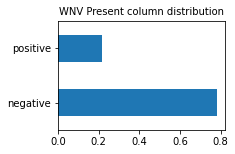

In [ ]:
# Visualize the distribution of WNV Present column 
plt.figure(figsize= (3,2))
categorical_df['WNV Present'].value_counts(normalize=True).plot(kind="barh")
plt.title('WNV Present column distribution', size=10)
plt.show()

78% of the test were negative and 22% were positive, the data is imbalance. It is important to recognize this inbalance during the predictive models evaluation because the majority number of negatives could cause bias in the prediction.

In [ ]:
# Binarization of WNV Present column (Point 1.1 (1st part) solution)

categorical_df['WNV Present'].map({'positive': 1, 'negative': 0})

0        0
1        0
2        0
3        0
4        0
        ..
18490    1
18491    1
18492    1
18493    1
18494    1
Name: WNV Present, Length: 18495, dtype: int64

In [ ]:
# Add the binarized column to the df_processed
df_processed['WNV Present'] = categorical_df['WNV Present'].map({'positive': 1, 'negative': 0})
df_processed['WNV Present'].value_counts()

0    14501
1     3994
Name: WNV Present, dtype: int64

In [ ]:
# Sanity check
df_processed.head()

,WNV Present
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Now 'WNV Present' column will be dropped from the df_categorical dataframe:
categorical_df.drop(columns='WNV Present', inplace=True)
categorical_df.head()

,Address Block,Trap,Trap type,Date,Species
0,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
1,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
2,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
3,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS
4,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,CULEX RESTUANS


Process next categorical column 

In [ ]:
# See the characteristics of the other categorical columns
categorical_df.nunique().sort_values()

Trap type          4
Species            4
Address Block    154
Trap             190
Date             298
dtype: int64

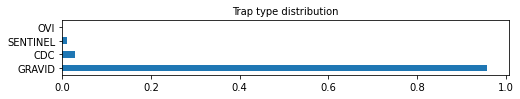

In [ ]:
# Trap type column (Point 1.1 (2nd part) solution)
plt.figure(figsize =(8,1))
categorical_df['Trap type'].value_counts(normalize=True).plot(kind="barh")
plt.title('Trap type distribution', size=10)
plt.show()

In [ ]:
pd.crosstab(categorical_df['Trap type'], df['WNV Present'], normalize=True) 

WNV Present,negative,positive
Trap type,,
CDC,0.022871,0.006542
GRAVID,0.754312,0.204920
OVI,0.000054,0.000000
SENTINEL,0.006813,0.004488


More than 95% of the traps were GRAVID traps, maybe this dummy columns are not going to be really meaningful to predict the WNV present because almost all the test positive and negatives are in this category.

In [ ]:
# Create Dummy categories for Trap type column
pd.get_dummies(categorical_df['Trap type'])

,CDC,GRAVID,OVI,SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


In [ ]:
pd.get_dummies(categorical_df[['Trap type']])

,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,1,0,0
18492,0,1,0,0
18493,0,0,0,1


In [ ]:
# Drop OVI traps to reduce colinearity
pd.get_dummies(categorical_df[['Trap type']]).drop(columns=['Trap type_OVI'])

,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
18490,0,1,0
18491,0,1,0
18492,0,1,0
18493,0,0,1


In [ ]:
# Cocatenate the new processed trap type column to the processed dataframe

df_processed = pd.concat([df_processed, pd.get_dummies(categorical_df[['Trap type']]).drop(columns=['Trap type_OVI'])], axis=1)
df_processed.head()

,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
# Good practice, drop Trap type column from categorical_df

categorical_df.drop(columns=['Trap type'], inplace=True)

Process next categorical column 

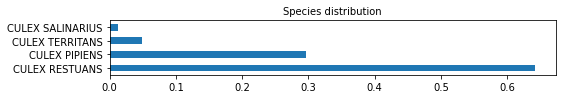

In [ ]:
# Species column
plt.figure(figsize =(8,1))
categorical_df['Species'].value_counts(normalize=True).plot(kind="barh")
plt.title('Species distribution', size=10)
plt.show()

There are 4 species of mosquitos, roughly 65% of the mosquitos are Restuans specie, 30% Pipiens, Territans represent close 4% and Salinarus ~1%

In [ ]:
pd.crosstab(categorical_df['Species'], df['WNV Present'], normalize=True) 

WNV Present,negative,positive
Species,,
CULEX PIPIENS,0.220276,0.076345
CULEX RESTUANS,0.503325,0.138254
CULEX SALINARIUS,0.011625,0.000595
CULEX TERRITANS,0.048824,0.000757


Positive test are more probable in Restuans and Pipiens species.

In [ ]:
# Create Dummy categories for Species column
pd.get_dummies(categorical_df['Species'])

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0
18493,0,1,0,0


In [ ]:
pd.get_dummies(categorical_df[['Species']])

,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
18490,1,0,0,0
18491,1,0,0,0
18492,0,1,0,0
18493,0,1,0,0


In [ ]:
# Drop Species_CULEX SALINARIUS to reduce colinearity
pd.get_dummies(categorical_df[['Species']]).drop(columns=['Species_CULEX SALINARIUS'])

,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
18490,1,0,0
18491,1,0,0
18492,0,1,0
18493,0,1,0


In [ ]:
# Cocatenate the new processed Species columns to the processed dataframe

df_processed = pd.concat([df_processed, pd.get_dummies(categorical_df[['Species']]).drop(columns=['Species_CULEX SALINARIUS'])], axis=1)
df_processed.head()

,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
0,0,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0


In [ ]:
# Good practice, drop Trap tpe column from categorical_df

categorical_df.drop(columns=['Species'], inplace=True)

Columns pending to process

In [ ]:
# Columns in categorical_df that need to be processed later
categorical_df.nunique()

Address Block    154
Trap             190
Date             298
dtype: int64

Next column to be processed 

In [ ]:
# Address block column
categorical_df['Address Block'].nunique()

154

Process Address column it is not practical because it has 154 categories, however location information it's important in this kind of epidemiological analysis, then location zones will be created using latitude information.

In [ ]:
# Define 4 zones based on the distribution by quartiles of Latitud column

df['Location'] = pd.qcut(df['Lat'], 4, labels=['Zone_A', 'Zone_B', 'Zone_C', 'Zone_D'])
df['Location']

0        Zone_D
1        Zone_B
2        Zone_D
3        Zone_C
4        Zone_A
          ...  
18490    Zone_B
18491    Zone_C
18492    Zone_A
18493    Zone_C
18494    Zone_D
Name: Location, Length: 18495, dtype: category
Categories (4, object): ['Zone_A' < 'Zone_B' < 'Zone_C' < 'Zone_D']

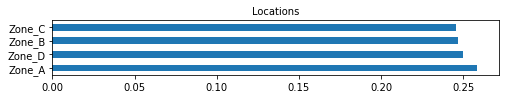

In [ ]:
# Visualize location zones column distribution 
plt.figure(figsize =(8,1))
df['Location'].value_counts(normalize=True).plot(kind="barh")
plt.title('Locations', size=10)
plt.show()


In [ ]:
pd.crosstab(df['Location'], df['WNV Present'], normalize=True) 

WNV Present,negative,positive
Location,,
Zone_A,0.216058,0.042498
Zone_B,0.204217,0.042444
Zone_C,0.189403,0.055853
Zone_D,0.174371,0.075155


In [ ]:
# Create Dummy categories for the new column 'Location_zones' (remember this column was generated in the initial df)
pd.get_dummies(df[['Location']])

,Location_Zone_A,Location_Zone_B,Location_Zone_C,Location_Zone_D
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
18490,0,1,0,0
18491,0,0,1,0
18492,1,0,0,0
18493,0,0,1,0


In [ ]:
# Drop Zone_B to reduce colinearity
pd.get_dummies(df[['Location']]).drop(columns=['Location_Zone_B']) #B location has the less percentage of WNV positive cases

,Location_Zone_A,Location_Zone_C,Location_Zone_D
0,0,0,1
1,0,0,0
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
18490,0,0,0
18491,0,1,0
18492,1,0,0
18493,0,1,0


In [ ]:
# Cocatenate the new processed Location zones columns to the processed dataframe

df_processed = pd.concat([df_processed, pd.get_dummies(df[['Location']]).drop(columns=['Location_Zone_B'])], axis=1)

In [ ]:
df_processed.head()

,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Location_Zone_A,Location_Zone_C,Location_Zone_D
0,0,0,1,0,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0


In [ ]:
# Drop Address Block column from categorical_df because the analysis about location will be done based on Latitud and Location Zones.

categorical_df.drop(columns=['Address Block'], inplace=True)

In [ ]:
# Columns in categorical_df that need to be processed
categorical_df.nunique()

Trap    190
Date    298
dtype: int64

Date column

The dataframe contains information about year, month and week then could be redundant include Date column as well. However, let's try to do something and see if it could generate new insights.

In [ ]:
# See again the format of the column
categorical_df['Date'].head()

0    2019-09-26 00:09:00
1    2019-09-26 00:09:00
2    2019-09-26 00:09:00
3    2019-09-26 00:09:00
4    2019-09-26 00:09:00
Name: Date, dtype: object

In [ ]:
# Set the date type
pd.to_datetime(categorical_df['Date'], format='%').head()

0   2019-09-26 00:09:00
1   2019-09-26 00:09:00
2   2019-09-26 00:09:00
3   2019-09-26 00:09:00
4   2019-09-26 00:09:00
Name: Date, dtype: datetime64[ns]

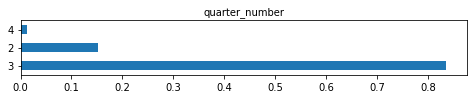

WNV Present,negative,positive
Date,,
2,0.150581,0.002379
3,0.621682,0.213193
4,0.011787,0.000378


In [ ]:
# Build the Year quarters: Q_1  = Jan, Feb, Mar  Q_2 = Apr, May, Jun Q_3 = Jul, Aug, Sep Q_4 = Oct, Nov, Dec

quarter_number = pd.to_datetime(categorical_df['Date'], format='%').dt.quarter

# Visualize location zones column distribution
plt.figure(figsize =(8,1))
pd.to_datetime(categorical_df['Date'], format='%').dt.quarter.value_counts(normalize=True).plot(kind="barh")
plt.title('quarter_number', size=10)
plt.show()

pd.crosstab([pd.to_datetime(categorical_df['Date'], format='%').dt.quarter], df['WNV Present'], normalize=True) 

The dataframe did not include information for all the months, the records are from March to October

In [ ]:
pd.get_dummies(quarter_number, prefix="Year_quarter").head()

,Year_quarter_2,Year_quarter_3,Year_quarter_4
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
# Q_2 = Apr, May, Jun Q_3 = Jul, Aug, Sep
pd.get_dummies(quarter_number, prefix='Year_quarter').drop(columns='Year_quarter_4')

,Year_quarter_2,Year_quarter_3
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
18490,0,1
18491,0,1
18492,0,1
18493,0,1


In [ ]:
# Concatenate this dummy columns to the processed df.

In [ ]:
df_processed = pd.concat([df_processed, pd.get_dummies(quarter_number, prefix='Year_quarter').drop(columns='Year_quarter_4')], axis=1)
df_processed.head()

,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Location_Zone_A,Location_Zone_C,Location_Zone_D,Year_quarter_2,Year_quarter_3
0,0,0,1,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,1,0,0,0,1


Trap column

The most meaningful way to group the 190 Traps would be by type of trap and the df_processed already has those dummy columns. Another good way to group the trap could be by area. However, if we want to analyze the relations between location and other variables we can use location dummies columns or Latitud and Longitude.

Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. 
Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.

Let's try to find if the percentage of this "satellite traps" could be relevant in the analysis

In [ ]:
# Find the total number of satellite traps

satellite_traps = df[df['Trap'].str.contains('[A-Z]$', regex=True)]

count_satellite_traps = df['Trap'].str.contains('[A-Z]$', regex=True).sum()

print(f'The total number of satellite traps is {count_satellite_traps} traps')


The total number of satellite traps is 590 traps


In [ ]:
# Percentage of satellite traps over total number of traps

print(f'The percentage of satellite traps over total number of traps is {(590/18495)*100} %')

The percentage of satellite traps over total number of traps is 3.190051365233847 %


The percentage of satellite trap over the total number of traps is too low to be considered important include dummy columns regarding them.

In [ ]:
# Drop 'Trap' and 'Date' column from categorical_df
categorical_df.drop(columns=['Trap', 'Date'], inplace=True)

In [ ]:
# Check all the categorical columns were processed
categorical_df

""
0
1
2
3
4
...
18490
18491
18492
18493


In [ ]:
# Check df_processed, so far all categorical columns were processed:
df_processed.head()

,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Location_Zone_A,Location_Zone_C,Location_Zone_D,Year_quarter_2,Year_quarter_3
0,0,0,1,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,1,0,0,0,1


#### Numeric columns processed

Exploration of the data 

In [ ]:
# Remember the numerical data
numeric_df.describe()

,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


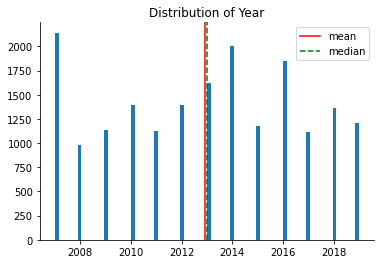

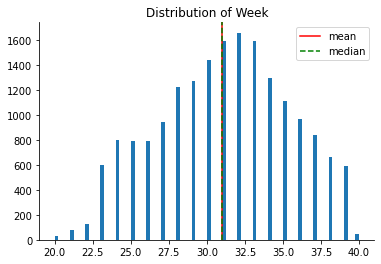

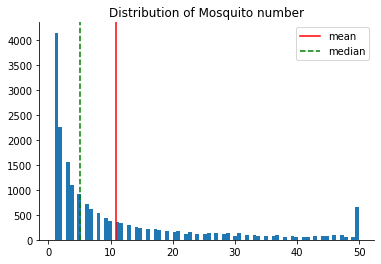

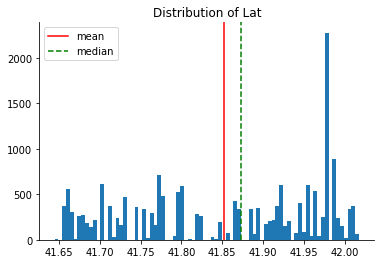

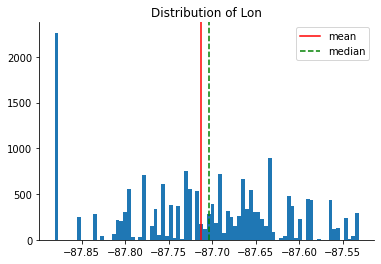

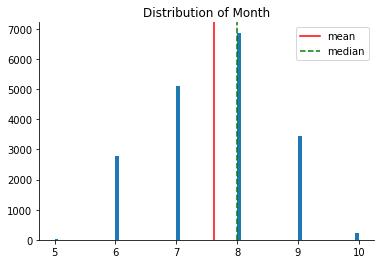

In [ ]:
# Visualize the distribution of numeric columms
for column in numeric_df:

    plt.hist(numeric_df[column], bins=80)

    plt.axvline(numeric_df[column].mean(), 0, 1000, label="mean", color="red")
    plt.axvline(numeric_df[column].median(), 0, 1000, label="median", color="green", linestyle="--")

    plt.title(f"Distribution of {column}")
    sns.despine()
    plt.legend()
    plt.show()

Analysis: The distributions are in general skewed and they do not look simetrics, except for Month distribution that looks simetric but the mean and median are located in different points. Mean and median are very close in Year and Week distributions. 



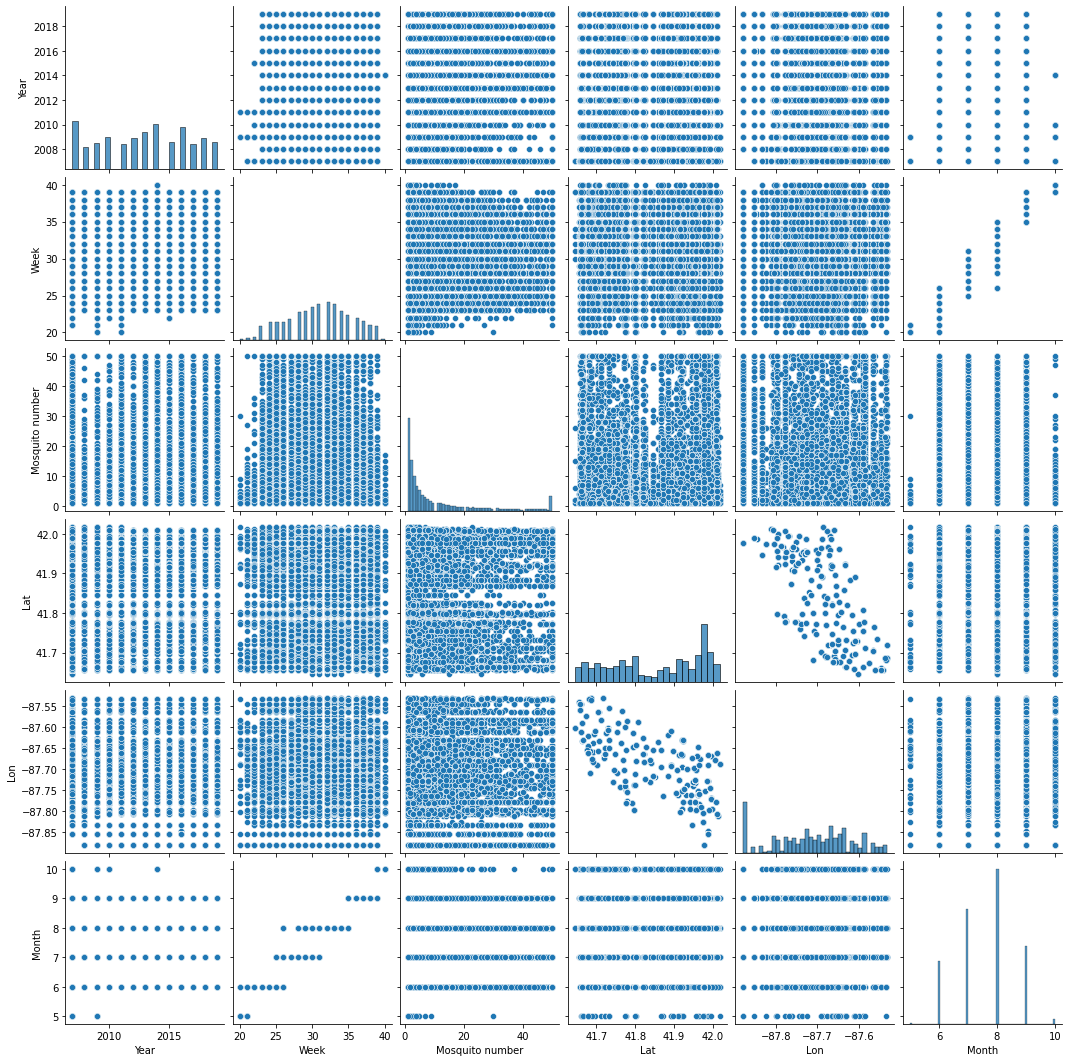

In [ ]:
# Lets check for collinearity and multi-collinearity:

sns.pairplot(numeric_df)
plt.show()

Apparently could exist collinearity between Month and week variables, as well as is expected exist some correlation between Longitud and latitude.

In [ ]:
# Pearson Coefficient

numeric_df.corr()

,Year,Week,Mosquito number,Lat,Lon,Month
Year,1.000000,-0.023283,0.129326,0.093983,-0.094628,-0.100847
Week,-0.023283,1.000000,-0.033900,-0.002876,0.002967,0.948940
Mosquito number,0.129326,-0.033900,1.000000,0.096820,-0.151421,-0.040426
Lat,0.093983,-0.002876,0.096820,1.000000,-0.749416,-0.011544
Lon,-0.094628,0.002967,-0.151421,-0.749416,1.000000,0.010695
Month,-0.100847,0.948940,-0.040426,-0.011544,0.010695,1.000000


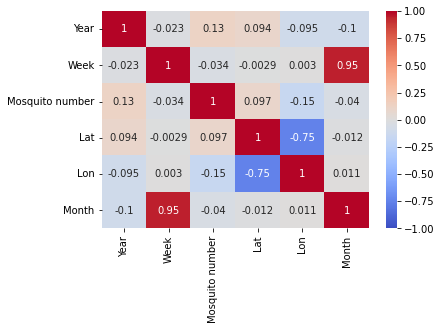

In [ ]:
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

The results of apply the pearson coefficient demonstrated there is collinearity between variables Month - Week.

Multicolinaerity could:

- Affects the interpretation of the coefficients
- Makes the coefficients unstable
- Increases the standard error of the coefficients
- May reduce predictive ability

This results help to plan the best combination of variables during the application of the statistical models.

Concatenate numerical columns with processed df

In [ ]:
# Concatenate numeric columns to the processed dataframe
df_processed = pd.concat([df_processed, numeric_df], axis=1)
df_processed

,WNV Present,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Location_Zone_A,Location_Zone_C,Location_Zone_D,Year_quarter_2,Year_quarter_3,Year,Week,Mosquito number,Lat,Lon,Month
0,0,0,1,0,0,1,0,0,0,1,0,1,2019,39,2,41.977738,-87.880969,9
1,0,0,1,0,0,1,0,0,0,0,0,1,2019,39,1,41.798211,-87.736925,9
2,0,0,1,0,0,1,0,0,0,1,0,1,2019,39,2,41.987245,-87.689417,9
3,0,0,1,0,0,1,0,0,1,0,0,1,2019,39,1,41.953664,-87.724987,9
4,0,0,1,0,0,1,0,1,0,0,0,1,2019,39,9,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,1,0,1,0,1,0,0,0,0,0,0,1,2016,36,4,41.857843,-87.635858,9
18491,1,0,1,0,1,0,0,0,1,0,0,1,2007,34,19,41.965376,-87.758403,8
18492,1,0,1,0,0,1,0,1,0,0,0,1,2016,30,34,41.662395,-87.590176,7
18493,1,0,0,1,0,1,0,0,1,0,0,1,2017,33,50,41.919197,-87.664758,8


See the processed dataframe to verify is complete

In [ ]:
# Sanity check
# processed dataframe information
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WNV Present              18495 non-null  int64  
 1   Trap type_CDC            18495 non-null  uint8  
 2   Trap type_GRAVID         18495 non-null  uint8  
 3   Trap type_SENTINEL       18495 non-null  uint8  
 4   Species_CULEX PIPIENS    18495 non-null  uint8  
 5   Species_CULEX RESTUANS   18495 non-null  uint8  
 6   Species_CULEX TERRITANS  18495 non-null  uint8  
 7   Location_Zone_A          18495 non-null  uint8  
 8   Location_Zone_C          18495 non-null  uint8  
 9   Location_Zone_D          18495 non-null  uint8  
 10  Year_quarter_2           18495 non-null  uint8  
 11  Year_quarter_3           18495 non-null  uint8  
 12  Year                     18495 non-null  int64  
 13  Week                     18495 non-null  int64  
 14  Mosquito number       

#### Basic Statistical Analysis

**Relation between Number of mosquitoes and Month** 

Average number of mosquitoes for each month: Trends in this relationship 

In [ ]:
# Calculate the average number of mosquitoes per month (Point 1.2 Solution)
avg_mosq_per_month = df_processed.groupby('Month')['Mosquito number'].mean()

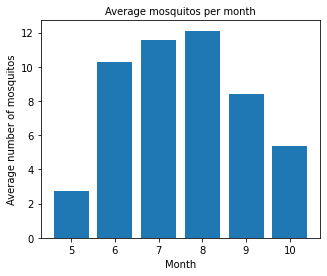

In [ ]:
# Visualize the result
plt.figure(figsize=(5,4))
plt.bar(avg_mosq_per_month.index, avg_mosq_per_month.values)
plt.xlabel('Month')
plt.ylabel('Average number of mosquitos')
plt.title('Average mosquitos per month', size=10)
plt.show()

The graph hints about one possible significant relation between month and number of mosquitos, given the difference in the average of number in some of the months, the most notorious comparison is the low average number of mosquitoes in may against the higher average in August.

**Relation between the different mosquito species and occurrence of West Nile Virus**

It is needed to test for independence across multiple categories

In [ ]:
# Crosstab to visualize the WNV prevalence by specie (using the initial dataframe)
cr = pd.crosstab(df['WNV Present'], df['Species'])
cr

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
negative,4074,9309,215,903
positive,1412,2557,11,14


In [ ]:
# Crosstab to visualize the WNV prevalence by specie (using the initial dataframe)
cr_perc = pd.crosstab(df['WNV Present'], df['Species'], normalize=True)
cr_perc

Species,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
negative,0.220276,0.503325,0.011625,0.048824
positive,0.076345,0.138254,0.000595,0.000757


Hypothesis

𝐻0
 : There is no relationship between WNV Present and Mosquito specie (They are independent.)

𝐻1
: There is some relationship between WNV Present and Mosquito specie (They are not independent.)

In [ ]:
# import the library requiered

from scipy import stats
from scipy.stats import norm #used for plotting

In [ ]:
# Perform the chi2 test

stats.chi2_contingency(cr)

(311.10394683130164,
 3.9302341764409087e-67,
 3,
 array([[4301.29689105, 9303.5342525 ,  177.19524196,  718.97361449],
        [1184.70310895, 2562.4657475 ,   48.80475804,  198.02638551]]))

The function returns a Chi squared statistic = 311.1 and p-value = 3.9e⁻67

**Conclusion:** With a p-value of 3.9e⁻67, we can reject the null hypothesis. It appears that there is some relationship between WNV Present and the mosquito specie.

## 6. Advanced Statistical Analysis

Now the data is ready to be put into the models. 

### Lineal Regression Model

In [ ]:
import statsmodels.api as sm

#### Linear Model Diagnostics

Define the variables independent and the dependent

In [ ]:
# Set the variables
x = df_processed.drop(columns=['WNV Present','Mosquito number','Week']) #Drop week because it is correlated with Month.
Y = df_processed['Mosquito number']

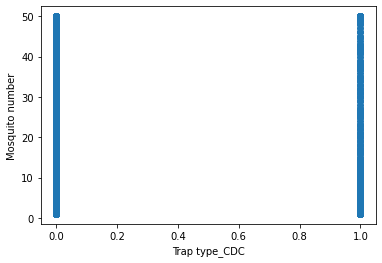

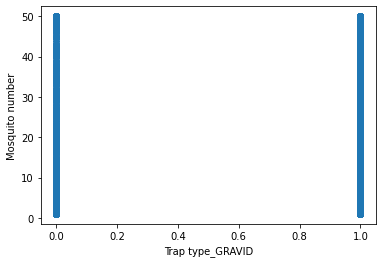

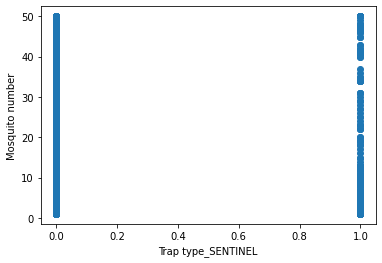

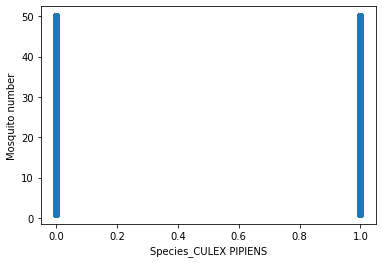

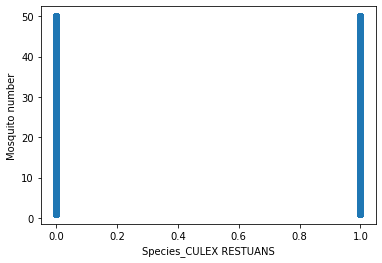

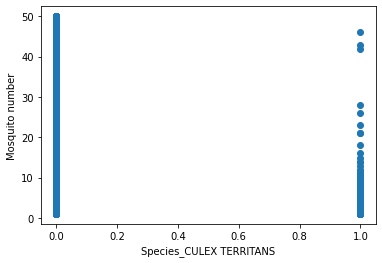

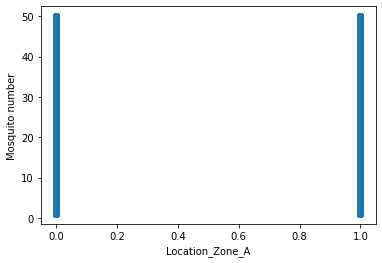

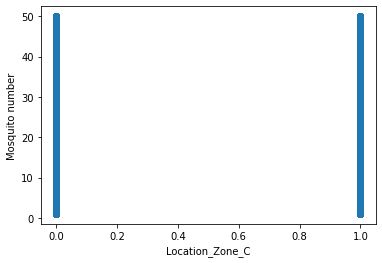

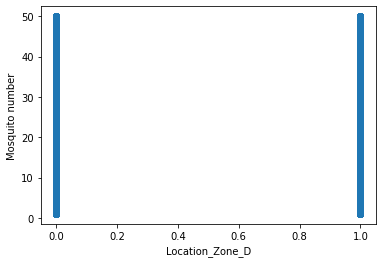

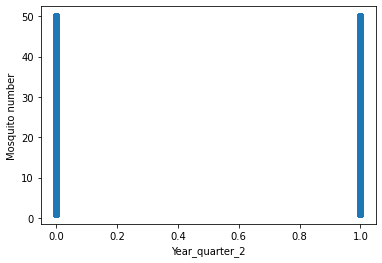

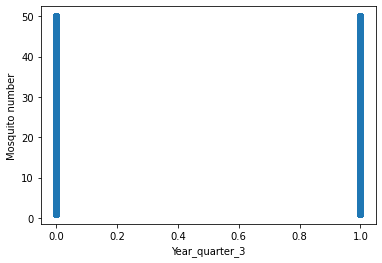

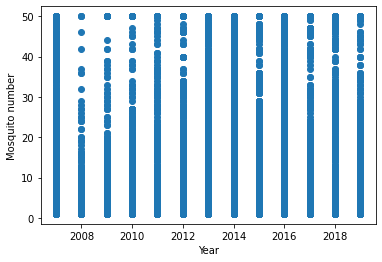

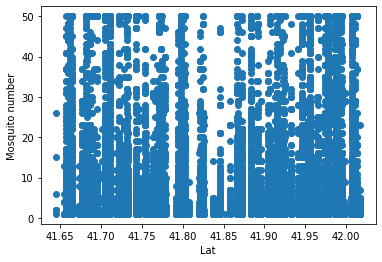

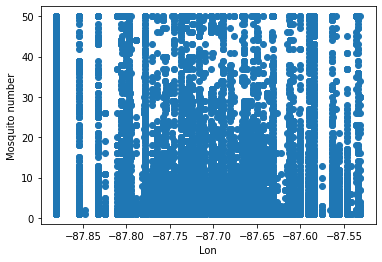

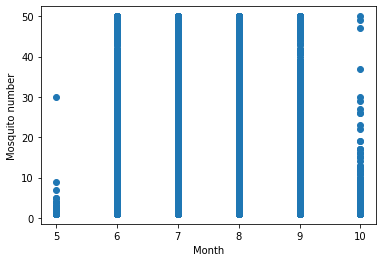

In [ ]:
# Loop to make the plots and visualize tha characteristics of the relations
for column in x.columns: 
    plt.figure()
    plt.scatter(x[column], Y)
    plt.ylabel('Mosquito number')
    plt.xlabel(column)
    plt.show();

There seems that there is not linear relationship present in the plots, but let's try to fit a linear model.

In [ ]:
# Set the constant to x columns 
x_withconstant = sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# 1. Instantiate model with all the varibles independent
lm_df = sm.OLS(Y, x_withconstant)

# 2. Fit model
lm_df_results = lm_df.fit()

# Summary
lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        02:15:16   Log-Likelihood:                -73278.
No. Observations:               18495   AIC:                         1.466e+05
Df Residuals:                   18479   BIC:                         1.467e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2555.4485    193.379    -13.215      0.000   -2934.490   -2176.407
Trap type_CDC              16.1205     12.744      1.265      0.206      -8.858      41.099
Trap type_GRAVID            5.7966     12.732      0.455      0.649     -19.160      30.753
Trap type_SENTINEL         18.6631     12.768      1.462      0.144      -6.362      43.689
Species_CULEX PIPIENS      10.0795      0.866     11.637      0.000       8.382      11.777
Species_CULEX RESTUANS      8.9065      0.860     10.360      0.000       7.221      10.592
Species_CULEX TERRITANS     0.9718      0.949      1.024      0.306      -0.889       2.833
Location_Zone_A             2.7872      0.452      6.162      0.000       1.901       3.674
Location_Zone_C             1.6832      0.497      3.385      0.001       0.709       2.658
Location_Zone_D             4.3737      0.685      6.387      0.000       3.032       5.716
Year_quarter_2             -2.2237      1.048     -2.123      0.034      -4.277      -0.170
Year_quarter_3              1.1841      0.908      1.305      0.192      -0.595       2.963
Year                        0.5274      0.028     18.794      0.000       0.472       0.582
Lat                        -7.5723      3.440     -2.201      0.028     -14.315      -0.830
Lon                       -20.6879      1.573    -13.156      0.000     -23.770     -17.606
Month                      -1.4290      0.143    -10.003      0.000      -1.709      -1.149
==============================================================================
Omnibus:                     4355.623   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8415.921
Skew:                           1.460   Prob(JB):                         0.00
Kurtosis:                       4.547   Cond. No.                     4.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model did not evidence strength and significance of the relationship between the independent and dependent variables, the R² is 0,1, standard errors are high in some variables indicating that the coefficient estimates are not stable and reliable.

**2 iteration**

In [ ]:
x.columns

Index(['Trap type_CDC', 'Trap type_GRAVID', 'Trap type_SENTINEL',
       'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',
       'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C',
       'Location_Zone_D', 'Year_quarter_2', 'Year_quarter_3', 'Year', 'Lat',
       'Lon', 'Month'],
      dtype='object')

In [ ]:
# Model without the columns: CDC and SENTINEL traps, TERRITIANS specie and years_quarter_2, 'Lat', 'Lon' (columns with high P value and std error).

lm_df = sm.OLS(Y, x_withconstant.drop(columns=['Trap type_CDC', 'Trap type_SENTINEL', 'Species_CULEX TERRITANS', 'Year_quarter_2', 'Lat', 'Lon']))

lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     228.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:33:56   Log-Likelihood:                -73369.
No. Observations:               18495   AIC:                         1.468e+05
Df Residuals:                   18485   BIC:                         1.468e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1088.3944     54.965    -19.801      0.000   -1196.132    -980.657
Trap type_GRAVID         -10.7413      0.484    -22.172      0.000     -11.691      -9.792
Species_CULEX PIPIENS      9.5906      0.421     22.797      0.000       8.766      10.415
Species_CULEX RESTUANS     8.3609      0.400     20.912      0.000       7.577       9.145
Location_Zone_A            2.1603      0.266      8.116      0.000       1.639       2.682
Location_Zone_C            1.6893      0.268      6.292      0.000       1.163       2.215
Location_Zone_D            5.6955      0.268     21.289      0.000       5.171       6.220
Year_quarter_3             3.0527      0.317      9.642      0.000       2.432       3.673
Year                       0.5495      0.027     20.098      0.000       0.496       0.603
Month                     -1.2766      0.123    -10.397      0.000      -1.517      -1.036
==============================================================================
Omnibus:                     4359.571   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8401.552
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                       4.522   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Good, now the model has significant p values and standard error improved. R-squared is low but the exercise advertised about it.

**3 iteration**

In [ ]:
# Model with the columns: 'Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Month'

lm_df = sm.OLS(Y, x_withconstant.drop(columns=['Trap type_CDC', 'Trap type_SENTINEL', 'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C',
       'Location_Zone_D', 'Year_quarter_2', 'Year_quarter_3', 'Year', 'Lat', 'Lon',]))

lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     241.5
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.61e-202
Time:                        04:25:59   Log-Likelihood:                -73874.
No. Observations:               18495   AIC:                         1.478e+05
Df Residuals:                   18490   BIC:                         1.478e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     15.7252      1.022     15.381      0.000      13.721      17.729
Trap type_GRAVID          -9.6213      0.492    -19.557      0.000     -10.586      -8.657
Species_CULEX PIPIENS      9.0209      0.430     20.994      0.000       8.179       9.863
Species_CULEX RESTUANS     9.4614      0.408     23.168      0.000       8.661      10.262
Month                     -0.5719      0.103     -5.550      0.000      -0.774      -0.370
==============================================================================
Omnibus:                     4676.328   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9360.405
Skew:                           1.551   Prob(JB):                         0.00
Kurtosis:                       4.588   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model reduced the R² value

**4 iteration**

In [ ]:
# Model with the columns: 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Month'

lm_df = sm.OLS(Y, x_withconstant.drop(columns=['Trap type_GRAVID', 'Trap type_CDC', 'Trap type_SENTINEL', 'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C',
       'Location_Zone_D', 'Year_quarter_2', 'Year_quarter_3', 'Year','Lat', 'Lon']))

lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.03e-121
Time:                        04:27:50   Log-Likelihood:                -74064.
No. Observations:               18495   AIC:                         1.481e+05
Df Residuals:                   18491   BIC:                         1.482e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.7144      0.894      6.391      0.000       3.962       7.467
Species_CULEX PIPIENS      9.3947      0.434     21.663      0.000       8.545      10.245
Species_CULEX RESTUANS     9.4411      0.413     22.883      0.000       8.632      10.250
Month                     -0.4823      0.104     -4.637      0.000      -0.686      -0.278
==============================================================================
Omnibus:                     4915.342   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10153.536
Skew:                           1.612   Prob(JB):                         0.00
Kurtosis:                       4.667   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like less variables is not helping to improve the model

**5 iteration**

See if the trend between Mosquito number and months can generate something in the model

In [ ]:
# Model with the columns: 'Month'

lm_df = sm.OLS(Y, x_withconstant.drop(columns=['Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Lat', 'Lon', 'Trap type_GRAVID', 'Trap type_CDC', 'Trap type_SENTINEL', 'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C',
       'Location_Zone_D', 'Year_quarter_2', 'Year_quarter_3', 'Year']))

lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     30.27
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           3.80e-08
Time:                        03:03:48   Log-Likelihood:                -74330.
No. Observations:               18495   AIC:                         1.487e+05
Df Residuals:                   18493   BIC:                         1.487e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0428      0.763     19.714      0.000      13.547      16.538
Month         -0.5458      0.099     -5.502      0.000      -0.740      -0.351
==============================================================================
Omnibus:                     5019.927   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10488.192
Skew:                           1.642   Prob(JB):                         0.00
Kurtosis:                       4.679   Cond. No.                         60.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model evaluation

It will be evaluated the second iteration model because it had the best R² and p values.

In [ ]:
# Model without the columns: CDC and SENTINEL traps, TERRITIANS specie and years_quarter_2, 'Lat', 'Lon' (columns with high P value and std error).

lm_df = sm.OLS(Y, x_withconstant.drop(columns=['Trap type_CDC', 'Trap type_SENTINEL', 'Species_CULEX TERRITANS', 'Year_quarter_2', 'Lat', 'Lon']))

lm_df_results = lm_df.fit()

lm_df_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     228.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:35:09   Log-Likelihood:                -73369.
No. Observations:               18495   AIC:                         1.468e+05
Df Residuals:                   18485   BIC:                         1.468e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1088.3944     54.965    -19.801      0.000   -1196.132    -980.657
Trap type_GRAVID         -10.7413      0.484    -22.172      0.000     -11.691      -9.792
Species_CULEX PIPIENS      9.5906      0.421     22.797      0.000       8.766      10.415
Species_CULEX RESTUANS     8.3609      0.400     20.912      0.000       7.577       9.145
Location_Zone_A            2.1603      0.266      8.116      0.000       1.639       2.682
Location_Zone_C            1.6893      0.268      6.292      0.000       1.163       2.215
Location_Zone_D            5.6955      0.268     21.289      0.000       5.171       6.220
Year_quarter_3             3.0527      0.317      9.642      0.000       2.432       3.673
Year                       0.5495      0.027     20.098      0.000       0.496       0.603
Month                     -1.2766      0.123    -10.397      0.000      -1.517      -1.036
==============================================================================
Omnibus:                     4359.571   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8401.552
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                       4.522   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plan after fitting model

- Look if residuals are normally distributed: histogram

- Homoscedasticity: Look at a plot of the residuals vs. fitted values. It should look like random noise.

In [ ]:
# Residuals:
model_resids = lm_df_results.resid
model_resids

0       -13.995770
1        -9.300277
2       -13.995770
3       -10.989527
4        -3.460562
           ...    
18490    -5.881398
18491    11.098536
18492    20.634773
18493    27.091611
18494    -9.074264
Length: 18495, dtype: float64

In [ ]:
 # Fitted values:
model_fittedvals = lm_df_results.fittedvalues
model_fittedvals

0        15.995770
1        10.300277
2        15.995770
3        11.989527
4        12.460562
           ...    
18490     9.881398
18491     7.901464
18492    13.365227
18493    22.908389
18494    15.074264
Length: 18495, dtype: float64

Residuals histogram

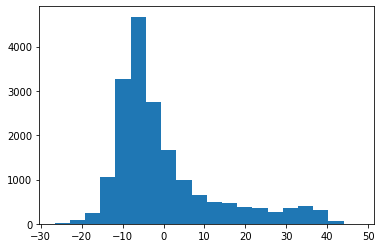

In [ ]:
plt.figure()
plt.hist(model_resids, bins = 20)
plt.show()

This histogram shows that there may be systematic errors in the model, could be secondary to inadequate inclusion of the variables. The model predictions are not accurate nor reliable.

Plot of the residuals vs. fitted values. 

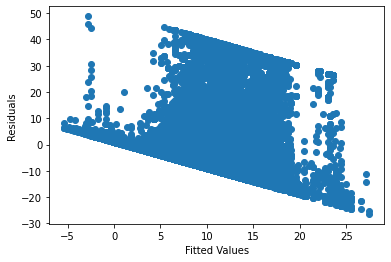

In [ ]:
plt.figure() 
plt.scatter(model_fittedvals, model_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The plot reveal a pattern then it suggest that the model is not capturing all the relevant patterns in the data. The funnel shape in this plot could be because the model has heteroscedasticity or non-constant variance.

In conclusion it was not possible to fit a good linear regresion model because the relationship between the dependent variable (Y) and the independent variables (X) are not linear.

### Logistic Regression Model

In [ ]:
import statsmodels.api as sm

#### Backward process


Start with the whole set of predictors. Define the variables independent and the dependent

In [ ]:
# Set the variables
X = df_processed.drop(columns=['WNV Present'])
y = df_processed['WNV Present']

In [ ]:
# all available columns
X.columns

Index(['Trap type_CDC', 'Trap type_GRAVID', 'Trap type_SENTINEL',
       'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',
       'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C',
       'Location_Zone_D', 'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week',
       'Mosquito number', 'Lat', 'Lon', 'Month'],
      dtype='object')

In [ ]:
X.shape, y.shape

((18495, 17), (18495,))

We separated the dependent variable (y) and the independent variables (X).

Now create the constant (X)

In [ ]:
# Set the constant
X_withconstant = sm.add_constant(X)
X_withconstant.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS,Location_Zone_A,Location_Zone_C,Location_Zone_D,Year_quarter_2,Year_quarter_3,Year,Week,Mosquito number,Lat,Lon,Month
0,1.0,0,1,0,0,1,0,0,0,1,0,1,2019,39,2,41.977738,-87.880969,9
1,1.0,0,1,0,0,1,0,0,0,0,0,1,2019,39,1,41.798211,-87.736925,9
2,1.0,0,1,0,0,1,0,0,0,1,0,1,2019,39,2,41.987245,-87.689417,9
3,1.0,0,1,0,0,1,0,0,1,0,0,1,2019,39,1,41.953664,-87.724987,9
4,1.0,0,1,0,0,1,0,1,0,0,0,1,2019,39,9,41.657069,-87.546049,9


Initiate the logistic regression model with ALL the independent variables in the df_processed

In [ ]:
# Logistic Regression Model
model = sm.Logit(y, X_withconstant)

results = model.fit()

results.summary()

         Current function value: 0.385667
         Iterations: 35


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18477
Method:                           MLE   Df Model:                           17
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2608
Time:                        02:08:51   Log-Likelihood:                -7132.9
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -395.5086   6962.225     -0.057      0.955    -1.4e+04    1.33e+04
Trap type_CDC              11.1693   6962.072      0.002      0.999   -1.36e+04    1.37e+04
Trap type_GRAVID           11.3103   6962.072      0.002      0.999   -1.36e+04    1.37e+04
Trap type_SENTINEL         10.7157   6962.072      0.002      0.999   -1.36e+04    1.37e+04
Species_CULEX PIPIENS       1.0665      0.321      3.319      0.001       0.437       1.696
Species_CULEX RESTUANS      0.7944      0.321      2.476      0.013       0.166       1.423
Species_CULEX TERRITANS    -1.3781      0.419     -3.290      0.001      -2.199      -0.557
Location_Zone_A            -0.4377      0.106     -4.114      0.000      -0.646      -0.229
Location_Zone_C             0.5783      0.117      4.957      0.000       0.350       0.807
Location_Zone_D             0.6894      0.162      4.265      0.000       0.373       1.006
Year_quarter_2             -1.0096      0.441     -2.288      0.022      -1.874      -0.145
Year_quarter_3              2.1379      0.399      5.357      0.000       1.356       2.920
Year                        0.1191      0.007     16.866      0.000       0.105       0.133
Week                        0.0785      0.016      4.822      0.000       0.047       0.110
Mosquito number             0.0674      0.002     43.477      0.000       0.064       0.070
Lat                        -4.5890      0.809     -5.671      0.000      -6.175      -3.003
Lon                        -3.7502      0.364    -10.289      0.000      -4.465      -3.036
Month                      -0.0158      0.073     -0.217      0.829      -0.158       0.127
===========================================================================================
"""

It was not possible to train the model, the maximum Likelihood optimization failed to converge. This means the maximum number of iterations has been exceeded (35 iterations) and it was not possible to fit a model with this set of independent variables.

Plan:
- Remove the independent variables that has correlation among them: Month or week column.
- Remove the columns with large p-values: Trap_type_SENTINEL and Trap_type_CDC

- Drop those columns which didn't seem significant based on the exploratory data analysis: in the iterations evaluate the possibility of eliminate Latitude column, Species_CULEX TERRITANS, Year_quarter_2 and Year, also other columns with negative coefficients.

**2 attemp**

In [ ]:
# all available columns
X.columns

Index(['Trap type_CDC', 'Trap type_GRAVID', 'Trap type_SENTINEL',
       'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',
       'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C',
       'Location_Zone_D', 'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week',
       'Mosquito number', 'Lat', 'Lon', 'Month'],
      dtype='object')

In [ ]:
# Eliminate columns: Month, CDC and SENTINEL traps and try to fit the model again:

X_modified = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', 
                     'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week', 'Mosquito number', 'Lat', 'Lon']

model = sm.Logit(y, X_withconstant[X_modified])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.387653
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18481
Method:                           MLE   Df Model:                           13
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2570
Time:                        02:08:51   Log-Likelihood:                -7169.6
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Trap type_GRAVID            0.4351      0.107      4.081      0.000       0.226       0.644
Species_CULEX PIPIENS       1.0311      0.318      3.241      0.001       0.408       1.655
Species_CULEX RESTUANS      0.8057      0.318      2.536      0.011       0.183       1.428
Species_CULEX TERRITANS    -1.3986      0.416     -3.358      0.001      -2.215      -0.582
Location_Zone_A            -1.0365      0.078    -13.342      0.000      -1.189      -0.884
Location_Zone_C             1.2181      0.088     13.773      0.000       1.045       1.391
Location_Zone_D             1.7691      0.100     17.756      0.000       1.574       1.964
Year_quarter_2             -0.9338      0.431     -2.165      0.030      -1.779      -0.088
Year_quarter_3              2.1608      0.392      5.515      0.000       1.393       2.929
Year                        0.0987      0.006     15.388      0.000       0.086       0.111
Week                        0.0766      0.007     11.247      0.000       0.063       0.090
Mosquito number             0.0681      0.002     44.083      0.000       0.065       0.071
Lat                        -9.0966      0.608    -14.955      0.000     -10.289      -7.904
Lon                        -1.9788      0.289     -6.838      0.000      -2.546      -1.412
===========================================================================================
"""

Now the optimization was terminated successfully, with all the p values less than 0.05%. The negative coefficients help to understhand that the predicted probability for WNV presence is lowered in Location_Zone_A, Species_CULEX TERRITANS	and Year_quarter_2.

#### Forward selection

Let's try a simple model

In [ ]:
X_modified = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', 
                     'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week', 'Mosquito number', 'Lat', 'Lon']

predictor_columns = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS'] #Trap type and Species

model = sm.Logit(y, X_withconstant[predictor_columns])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.513681
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18491
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                 0.01544
Time:                        02:08:51   Log-Likelihood:                -9500.5
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                 2.843e-64
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Trap type_GRAVID           -0.6499      0.070     -9.225      0.000      -0.788      -0.512
Species_CULEX PIPIENS      -0.4644      0.071     -6.537      0.000      -0.604      -0.325
Species_CULEX RESTUANS     -0.6623      0.072     -9.253      0.000      -0.803      -0.522
Species_CULEX TERRITANS    -3.5315      0.278    -12.708      0.000      -4.076      -2.987
===========================================================================================
"""

Model accuracy:

In [ ]:
predicted_probs = results.predict(X_withconstant[predictor_columns])

predicted_registration = np.where(predicted_probs >= 0.5, 1, 0)

number_of_correct_prediction = (predicted_registration == y).sum()

accuracy = number_of_correct_prediction / y.shape[0]

accuracy

0.7829143011624764

The first model is 78% accurate.

In [ ]:
predicted_registration.sum()


21

In [ ]:
y.sum()

3994

In [ ]:
(predicted_registration.sum()/y.sum())*100

0.5257886830245367

| Model |                                           Predictors                                          | Accuracy |                    Comments                   |
|:-----:|:---------------------------------------------------------------------------------------------:|:--------:|:---------------------------------------------:|
|   #1  | Trap type and Species |    78%   | Only predicted 0,5%  of rows with WNV Present |

**2 iteration**

In [ ]:
X_modified = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', 
                     'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week', 'Mosquito number', 'Lat', 'Lon']

predictor_columns = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', ## Trap type and Species
                     'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D'] #

model = sm.Logit(y, X_withconstant[predictor_columns])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.505852
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18488
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                 0.03044
Time:                        05:04:18   Log-Likelihood:                -9355.7
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                1.158e-123
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Trap type_GRAVID           -0.7569      0.071    -10.604      0.000      -0.897      -0.617
Species_CULEX PIPIENS      -0.5021      0.078     -6.476      0.000      -0.654      -0.350
Species_CULEX RESTUANS     -0.7364      0.078     -9.471      0.000      -0.889      -0.584
Species_CULEX TERRITANS    -3.5301      0.280    -12.630      0.000      -4.078      -2.982
Location_Zone_A            -0.2360      0.054     -4.378      0.000      -0.342      -0.130
Location_Zone_C             0.2081      0.051      4.043      0.000       0.107       0.309
Location_Zone_D             0.5869      0.049     11.913      0.000       0.490       0.684
===========================================================================================
"""

Model accuracy

In [ ]:
predicted_probs = results.predict(X_withconstant[predictor_columns])

predicted_registration = np.where(predicted_probs >= 0.5, 1, 0)

number_of_correct_prediction = (predicted_registration == y).sum()

accuracy = number_of_correct_prediction / y.shape[0]

accuracy

0.7811300351446336

In [ ]:
predicted_registration.sum()


94

In [ ]:
y.sum()

3994

In [ ]:
(predicted_registration.sum()/y.sum())*100

2.3535302954431647

| Model |              Predictors              | Accuracy |                    Comments                   |
|:-----:|:------------------------------------:|:--------:|:---------------------------------------------:|
|   #1  |        Trap  type and Species        |    78%   | Only predicted 0.5%  of rows with WNV Present |
|   #2  | Trap type,Species and Location zones |   78 %   | Predict 2.3% of WNV Present                   |

**3 iteration**

In [ ]:
X_modified = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', 
                     'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week', 'Mosquito number', 'Lat', 'Lon']

predictor_columns = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', ## Trap type and Species
                     'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', # Location
                     'Year', 'Week', 'Mosquito number'] #Year, week and Mosquito number

model = sm.Logit(y, X_withconstant[predictor_columns])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.416352
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2020
Time:                        02:08:52   Log-Likelihood:                -7700.4
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Trap type_GRAVID            0.5341      0.104      5.155      0.000       0.331       0.737
Species_CULEX PIPIENS       0.7506      0.300      2.505      0.012       0.163       1.338
Species_CULEX RESTUANS      0.8493      0.299      2.840      0.005       0.263       1.436
Species_CULEX TERRITANS    -1.5638      0.403     -3.882      0.000      -2.353      -0.774
Location_Zone_A            -0.2687      0.062     -4.318      0.000      -0.391      -0.147
Location_Zone_C             0.1926      0.059      3.290      0.001       0.078       0.307
Location_Zone_D             0.3731      0.057      6.539      0.000       0.261       0.485
Year                       -0.0042      0.000    -22.965      0.000      -0.005      -0.004
Week                        0.1540      0.006     27.694      0.000       0.143       0.165
Mosquito number             0.0681      0.001     47.127      0.000       0.065       0.071
===========================================================================================
"""

Model Accuracy

In [ ]:
predicted_probs = results.predict(X_withconstant[predictor_columns])

predicted_registration = np.where(predicted_probs >= 0.5, 1, 0)

number_of_correct_prediction = (predicted_registration == y).sum()

accuracy = number_of_correct_prediction / y.shape[0]

accuracy

0.8092457420924575

In [ ]:
predicted_registration.sum()

1998

In [ ]:
y.sum()

3994

In [ ]:
(predicted_registration.sum()/y.sum())*100

50.0250375563345

| Model |                              Predictors                              | Accuracy |                    Comments                   |
|:-----:|:--------------------------------------------------------------------:|:--------:|:---------------------------------------------:|
|   #1  |                        Trap  type and Species                        |    78%   | Only predicted 0.5%  of rows with WNV Present |
|   #2  | Trap type,Species and Location zones                                 |   78 %   | Predict 2.3% of WNV Present                   |
| #3    | Trap type,Species and Location zones, Year, Week and Mosquito number |    80%   | Predict 50% of WNV Present                    |

Much better prediction rate using more variables

**4 iteration**

In [ ]:
# Let's try with the columns i consider could generate better predictions based on the exploratory analysis

X_modified = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', 
                     'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week', 'Mosquito number', 'Lat', 'Lon']

predictor_columns = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS',  ## Trap type Gravid and Species PIP and RES
                     'Location_Zone_C', 'Location_Zone_D', # Locations C and D
                     'Year_quarter_3',                     # Year_quarter_3 (Jul,Aug,Sep)
                     'Mosquito number'] #Mosquito number

model = sm.Logit(y, X_withconstant[predictor_columns])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.456369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18488
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.1253
Time:                        02:08:52   Log-Likelihood:                -8440.5
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Trap type_GRAVID          -1.9204      0.065    -29.725      0.000      -2.047      -1.794
Species_CULEX PIPIENS     -1.0501      0.068    -15.410      0.000      -1.184      -0.917
Species_CULEX RESTUANS    -1.1378      0.064    -17.803      0.000      -1.263      -1.013
Location_Zone_C            0.1622      0.048      3.371      0.001       0.068       0.256
Location_Zone_D            0.3484      0.046      7.572      0.000       0.258       0.439
Year_quarter_3             0.8937      0.057     15.670      0.000       0.782       1.005
Mosquito number            0.0578      0.001     42.430      0.000       0.055       0.060
==========================================================================================
"""

In [ ]:
predicted_probs = results.predict(X_withconstant[predictor_columns])

predicted_registration = np.where(predicted_probs >= 0.5, 1, 0)

number_of_correct_prediction = (predicted_registration == y).sum()

accuracy = number_of_correct_prediction / y.shape[0]

accuracy

0.7881589618815896

In [ ]:
(predicted_registration.sum()/y.sum())*100

51.02653980971458


| Model |                                                 Predictors                                                 | Accuracy |                    Comments                   |
|:-----:|:----------------------------------------------------------------------------------------------------------:|:--------:|:---------------------------------------------:|
|   #1  |                                           Trap  type and Species                                           |    78%   | Only predicted 0.5%  of rows with WNV Present |
|   #2  | Trap type,Species and Location zones                                                                       |   78 %   | Predict 2.3% of WNV Present                   |
|   #3  | Trap type,Species and Location zones, Year, Week and Mosquito number                                       |    80%   | Predict 50% of WNV Present                    |
|   #4  | Trap type Gravid and Species PIP and RES, Locations C and D, Year_quarter_3 (Jul,Aug,Sep), Mosquito number |    79%   |           Predict 51% of WNV Present          |

**5 iteration**

Let's try the model with all the independent variables

In [ ]:
X_modified = ['Trap type_GRAVID', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 
                     'Species_CULEX TERRITANS', 'Location_Zone_A', 'Location_Zone_C', 'Location_Zone_D', 
                     'Year_quarter_2', 'Year_quarter_3', 'Year', 'Week', 'Mosquito number', 'Lat', 'Lon']

predictor_columns = []

model = sm.Logit(y, X_withconstant[X_modified])

results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.387653
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18481
Method:                           MLE   Df Model:                           13
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2570
Time:                        02:08:53   Log-Likelihood:                -7169.6
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Trap type_GRAVID            0.4351      0.107      4.081      0.000       0.226       0.644
Species_CULEX PIPIENS       1.0311      0.318      3.241      0.001       0.408       1.655
Species_CULEX RESTUANS      0.8057      0.318      2.536      0.011       0.183       1.428
Species_CULEX TERRITANS    -1.3986      0.416     -3.358      0.001      -2.215      -0.582
Location_Zone_A            -1.0365      0.078    -13.342      0.000      -1.189      -0.884
Location_Zone_C             1.2181      0.088     13.773      0.000       1.045       1.391
Location_Zone_D             1.7691      0.100     17.756      0.000       1.574       1.964
Year_quarter_2             -0.9338      0.431     -2.165      0.030      -1.779      -0.088
Year_quarter_3              2.1608      0.392      5.515      0.000       1.393       2.929
Year                        0.0987      0.006     15.388      0.000       0.086       0.111
Week                        0.0766      0.007     11.247      0.000       0.063       0.090
Mosquito number             0.0681      0.002     44.083      0.000       0.065       0.071
Lat                        -9.0966      0.608    -14.955      0.000     -10.289      -7.904
Lon                        -1.9788      0.289     -6.838      0.000      -2.546      -1.412
===========================================================================================
"""

Model accuracy

In [ ]:
predicted_probs = results.predict(X_withconstant[X_modified])

predicted_registration = np.where(predicted_probs >= 0.5, 1, 0)

number_of_correct_prediction = (predicted_registration == y).sum()

accuracy = number_of_correct_prediction / y.shape[0]

accuracy

0.8173560421735604

In [ ]:
predicted_registration.sum()

2180

In [ ]:
y.sum()

3994

In [ ]:
(predicted_registration.sum()/y.sum())*100

54.58187280921381

| Model |                                                 Predictors                                                 | Accuracy |                    Comments                   |
|:-----:|:----------------------------------------------------------------------------------------------------------:|:--------:|:---------------------------------------------:|
|   #1  |                                           Trap  type and Species                                           |    78%   | Only predicted 0.5%  of rows with WNV Present |
|   #2  | Trap type,Species and Location zones                                                                       |   78 %   | Predict 2.3% of WNV Present                   |
|   #3  | Trap type,Species and Location zones, Year, Week and Mosquito number                                       |    80%   | Predict 50% of WNV Present                    |
|   #4  | Trap type Gravid and Species PIP and RES, Locations C and D, Year_quarter_3 (Jul,Aug,Sep), Mosquito number |    79%   |           Predict 51% of WNV Present          |
|   #5  |                                        All the independent variables                                       |    82%   |           Predict 54% of WNV Present          |

Iteration 5 is the best model

#### Model evaluation and Summary

In [ ]:
# Odds ratios
np.exp(results.params[1:])

Species_CULEX PIPIENS      2.804222
Species_CULEX RESTUANS     2.238291
Species_CULEX TERRITANS    0.246937
Location_Zone_A            0.354679
Location_Zone_C            3.380633
Location_Zone_D            5.865439
Year_quarter_2             0.393046
Year_quarter_3             8.678154
Year                       1.103779
Week                       1.079582
Mosquito number            1.070466
Lat                        0.000112
Lon                        0.138242
dtype: float64

Odds ratio > 1 will increase the odds of WNV present and odds ratio < 1 will decrease the WNV Present.

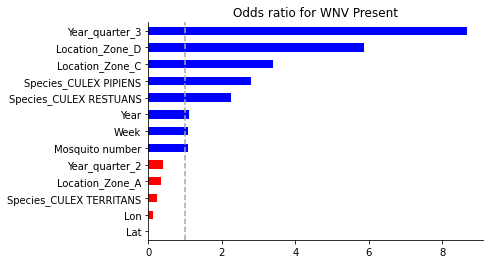

In [ ]:
# Plot odds ratios
np.exp(results.params[1:]).sort_values().plot(kind="barh", color=np.where(np.exp(results.params[1:]).sort_values() > 1, 'blue', 'red'))
plt.axvline(1, linestyle="--", color='darkgray')
plt.title('Odds ratio for WNV Present')
sns.despine()
plt.show()

- It is 8 times more probable to detect the virus if the test was done in the 3rd year quarter (Jul, Aug and Sept Months).
- As it was said the geography could have relation with higher or lower chance to detect the virus, Zone D has almost 6 times more probability to detect the virus.
- As the exploratory analysis show the majority of WVN cases were associated with Pipiens and Restuans Species. Nevertheless, it is interesting that roughly 65% of the mosquitos were Restuans specie and 30% were Pipiens but the probability to detect WNV virus is a little bit higher in Pipiens specie.

END
